In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import gc
import time
from sklearn.metrics import roc_auc_score
from mpl_toolkits.mplot3d import Axes3D

In [3]:
start_time = time.time()
meta_data = pd.read_csv('/content/drive/MyDrive/Multimodal_Single_Cell analysis/metadata.csv')
end_time = time.time()
print(end_time - start_time)
meta_data.head()

0.5786383152008057


,cell_id,day,donor,cell_type,technology
0,c2150f55becb,2,27678,HSC,citeseq
1,65b7edf8a4da,2,27678,HSC,citeseq
2,c1b26cb1057b,2,27678,EryP,citeseq
3,917168fa6f83,2,27678,NeuP,citeseq
4,2b29feeca86d,2,27678,EryP,citeseq


In [4]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281528 entries, 0 to 281527
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   cell_id     281528 non-null  object
 1   day         281528 non-null  int64 
 2   donor       281528 non-null  int64 
 3   cell_type   281528 non-null  object
 4   technology  281528 non-null  object
dtypes: int64(2), object(3)
memory usage: 10.7+ MB


In [5]:
meta_data["cell_type"].value_counts()

HSC       77535
hidden    55935
NeuP      42979
EryP      41479
MasP      34827
MkP       24021
MoP        3883
BP          869
Name: cell_type, dtype: int64

In [6]:
start_time = time.time()
train = pd.read_hdf('/content/drive/MyDrive/Multimodal_Single_Cell analysis/train_cite_inputs.h5')
display(train)
end_time = time.time()
print(end_time - start_time)

gene_id,ENSG00000121410_A1BG,ENSG00000268895_A1BG-AS1,ENSG00000175899_A2M,ENSG00000245105_A2M-AS1,ENSG00000166535_A2ML1,ENSG00000128274_A4GALT,ENSG00000094914_AAAS,ENSG00000081760_AACS,ENSG00000109576_AADAT,ENSG00000103591_AAGAB,...,ENSG00000153975_ZUP1,ENSG00000086827_ZW10,ENSG00000174442_ZWILCH,ENSG00000122952_ZWINT,ENSG00000198205_ZXDA,ENSG00000198455_ZXDB,ENSG00000070476_ZXDC,ENSG00000162378_ZYG11B,ENSG00000159840_ZYX,ENSG00000074755_ZZEF1
cell_id,,,,,,,,,,,,,,,,,,,,,
45006fe3e4c8,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,4.090185,0.000000
d02759a80ba2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.039545,0.0,0.0,0.000000,0.000000,0.000000,0.000000
c016c6b0efa5,0.0,0.0,0.0,0.0,0.0,3.847321,0.000000,3.847321,3.847321,0.000000,...,0.000000,0.000000,3.847321,4.529743,0.0,0.0,0.000000,3.847321,3.847321,0.000000
ba7f733a4f75,0.0,0.0,0.0,0.0,0.0,0.000000,3.436846,3.436846,0.000000,0.000000,...,3.436846,0.000000,4.113780,5.020215,0.0,0.0,0.000000,3.436846,4.113780,0.000000
fbcf2443ffb2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,4.196826,0.000000,0.000000,...,0.000000,4.196826,4.196826,4.196826,0.0,0.0,3.518610,4.196826,3.518610,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650ee456f0f3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,4.397535,4.397535,5.084510,0.0,0.0,0.000000,0.000000,4.397535,4.397535
cc506e7707f5,0.0,0.0,0.0,0.0,0.0,0.000000,3.981467,4.665241,0.000000,0.000000,...,3.981467,0.000000,4.665241,3.981467,0.0,0.0,0.000000,0.000000,3.981467,0.000000
a91f1b55a520,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,4.497696,0.000000,4.497696,...,0.000000,0.000000,0.000000,4.497696,0.0,0.0,3.815622,4.497696,0.000000,0.000000


38.080180168151855


In [7]:
X_train = pd.merge(meta_data, train, how='inner', on=['cell_id'])
X_train.head()

,cell_id,day,donor,cell_type,technology,ENSG00000121410_A1BG,ENSG00000268895_A1BG-AS1,ENSG00000175899_A2M,ENSG00000245105_A2M-AS1,ENSG00000166535_A2ML1,...,ENSG00000153975_ZUP1,ENSG00000086827_ZW10,ENSG00000174442_ZWILCH,ENSG00000122952_ZWINT,ENSG00000198205_ZXDA,ENSG00000198455_ZXDB,ENSG00000070476_ZXDC,ENSG00000162378_ZYG11B,ENSG00000159840_ZYX,ENSG00000074755_ZZEF1
0,45006fe3e4c8,2,32606,HSC,citeseq,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,4.090185,0.0
1,d02759a80ba2,2,32606,HSC,citeseq,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,4.039545,0.0,0.0,0.00000,0.000000,0.000000,0.0
2,c016c6b0efa5,2,32606,EryP,citeseq,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,3.847321,4.529743,0.0,0.0,0.00000,3.847321,3.847321,0.0
3,ba7f733a4f75,2,32606,NeuP,citeseq,0.0,0.0,0.0,0.0,0.0,...,3.436846,0.000000,4.113780,5.020215,0.0,0.0,0.00000,3.436846,4.113780,0.0
4,fbcf2443ffb2,2,32606,EryP,citeseq,0.0,0.0,0.0,0.0,0.0,...,0.000000,4.196826,4.196826,4.196826,0.0,0.0,3.51861,4.196826,3.518610,0.0


In [8]:
X_train["donor"].value_counts()

31800    24803
32606    23986
13176    22199
Name: donor, dtype: int64

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70988 entries, 0 to 70987
Columns: 22055 entries, cell_id to ENSG00000074755_ZZEF1
dtypes: float32(22050), int64(2), object(3)
memory usage: 5.8+ GB


In [10]:
X_train['technology'].value_counts()

citeseq    70988
Name: technology, dtype: int64

In [11]:
X_train["cell_type"].value_counts()

HSC     29879
EryP    14241
NeuP    12493
MasP     8242
MkP      5382
MoP       591
BP        160
Name: cell_type, dtype: int64

In [12]:
y_train = pd.DataFrame()

In [13]:
y_train["cell_type"] = X_train["cell_type"]
y_train.head()

,cell_type
0,HSC
1,HSC
2,EryP
3,NeuP
4,EryP


In [14]:
start_time = time.time()
test = pd.read_hdf('/content/drive/MyDrive/Multimodal_Single_Cell analysis/test_cite_inputs.h5')
display(test)
end_time = time.time()
print(end_time - start_time)

gene_id,ENSG00000121410_A1BG,ENSG00000268895_A1BG-AS1,ENSG00000175899_A2M,ENSG00000245105_A2M-AS1,ENSG00000166535_A2ML1,ENSG00000128274_A4GALT,ENSG00000094914_AAAS,ENSG00000081760_AACS,ENSG00000109576_AADAT,ENSG00000103591_AAGAB,...,ENSG00000153975_ZUP1,ENSG00000086827_ZW10,ENSG00000174442_ZWILCH,ENSG00000122952_ZWINT,ENSG00000198205_ZXDA,ENSG00000198455_ZXDB,ENSG00000070476_ZXDC,ENSG00000162378_ZYG11B,ENSG00000159840_ZYX,ENSG00000074755_ZZEF1
cell_id,,,,,,,,,,,,,,,,,,,,,
c2150f55becb,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,4.090185,0.000000
65b7edf8a4da,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.039545,0.000000,0.0,0.00000,0.000000,0.000000,0.000000
c1b26cb1057b,0.0,0.0,0.0,0.0,0.0,3.847321,0.000000,3.847321,3.847321,0.000000,...,0.000000,0.000000,3.847321,4.529743,0.000000,0.0,0.00000,3.847321,3.847321,0.000000
917168fa6f83,0.0,0.0,0.0,0.0,0.0,0.000000,3.436846,3.436846,0.000000,0.000000,...,3.436846,0.000000,4.113780,5.020215,0.000000,0.0,0.00000,3.436846,4.113780,0.000000
2b29feeca86d,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,4.196826,0.000000,0.000000,...,0.000000,4.196826,4.196826,4.196826,0.000000,0.0,3.51861,4.196826,3.518610,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a9b4d99f1f50,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,3.719836,...,0.000000,0.000000,0.000000,3.719836,0.000000,0.0,0.00000,0.000000,3.719836,0.000000
0e2c1d0782af,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,4.026206,0.000000,...,4.026206,0.000000,0.000000,4.026206,0.000000,0.0,0.00000,0.000000,4.710393,0.000000
a3cbc5aa0ec3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,4.306634,0.000000,0.000000,0.0,0.00000,4.306634,6.933096,4.993019


23.98650360107422


In [15]:
X_test = pd.merge(meta_data, test, how='inner', on=['cell_id'])
X_test.head()

,cell_id,day,donor,cell_type,technology,ENSG00000121410_A1BG,ENSG00000268895_A1BG-AS1,ENSG00000175899_A2M,ENSG00000245105_A2M-AS1,ENSG00000166535_A2ML1,...,ENSG00000153975_ZUP1,ENSG00000086827_ZW10,ENSG00000174442_ZWILCH,ENSG00000122952_ZWINT,ENSG00000198205_ZXDA,ENSG00000198455_ZXDB,ENSG00000070476_ZXDC,ENSG00000162378_ZYG11B,ENSG00000159840_ZYX,ENSG00000074755_ZZEF1
0,c2150f55becb,2,27678,HSC,citeseq,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,4.090185,0.0
1,65b7edf8a4da,2,27678,HSC,citeseq,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,4.039545,0.0,0.0,0.00000,0.000000,0.000000,0.0
2,c1b26cb1057b,2,27678,EryP,citeseq,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,3.847321,4.529743,0.0,0.0,0.00000,3.847321,3.847321,0.0
3,917168fa6f83,2,27678,NeuP,citeseq,0.0,0.0,0.0,0.0,0.0,...,3.436846,0.000000,4.113780,5.020215,0.0,0.0,0.00000,3.436846,4.113780,0.0
4,2b29feeca86d,2,27678,EryP,citeseq,0.0,0.0,0.0,0.0,0.0,...,0.000000,4.196826,4.196826,4.196826,0.0,0.0,3.51861,4.196826,3.518610,0.0


In [16]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48663 entries, 0 to 48662
Columns: 22055 entries, cell_id to ENSG00000074755_ZZEF1
dtypes: float32(22050), int64(2), object(3)
memory usage: 4.0+ GB


In [17]:
X_test['technology'].value_counts()

citeseq    48663
Name: technology, dtype: int64

In [18]:
X_test["cell_type"].value_counts()

HSC     12995
EryP    10103
MasP     9848
NeuP     8925
MkP      5418
MoP      1231
BP        143
Name: cell_type, dtype: int64

## Explore Data

<Axes: >

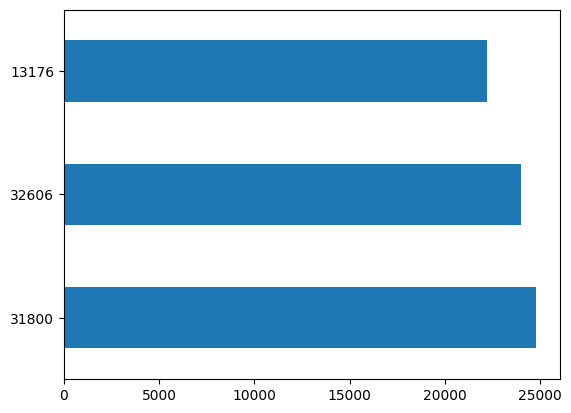

In [19]:
X_train["donor"].value_counts().plot(kind="barh")

<Axes: ylabel='cell_type'>

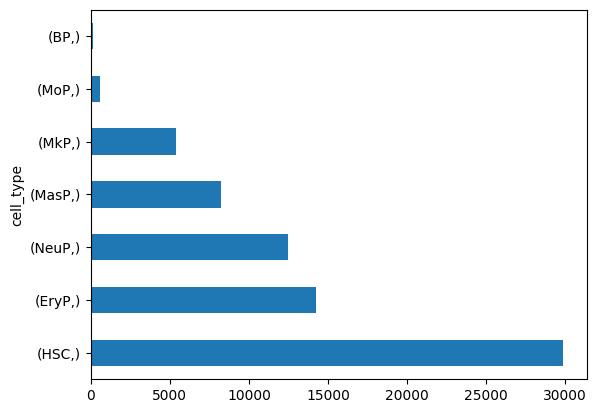

In [20]:
y_train.value_counts().plot(kind="barh")

In [21]:
min_zeros_columns = ['a', 'b']
min_zeros_counts = [float('inf'), float('inf')]

for column_name in train.columns:
    column = train[column_name]
    count = (column == 0.0).sum()

    if count < min_zeros_counts[0]:
        min_zeros_counts = [count, min_zeros_counts[0]]
        min_zeros_columns = [column_name, min_zeros_columns[0]]
    elif count < min_zeros_counts[1]:
        min_zeros_counts[1] = count
        min_zeros_columns[1] = column_name

print('Columns with the fewest number of zeros:', min_zeros_columns)
print('Number of zeros:', min_zeros_counts)

Columns with the fewest number of zeros: ['ENSG00000156508_EEF1A1', 'ENSG00000087086_FTL']
Number of zeros: [0, 0]


<Axes: xlabel='ENSG00000156508_EEF1A1', ylabel='ENSG00000087086_FTL'>

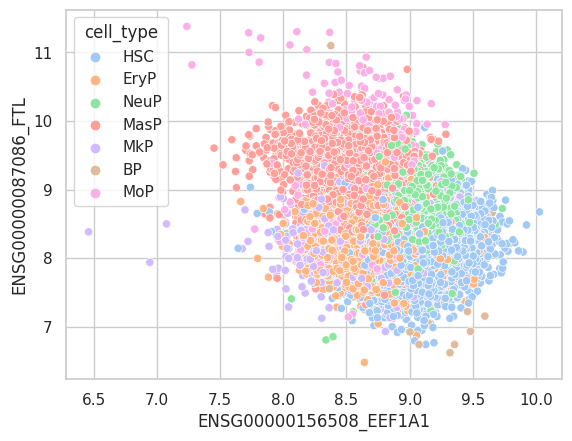

In [22]:
sns.set(style="whitegrid")
fig, ax = plt.subplots()
sns.scatterplot(data=X_train, x='ENSG00000156508_EEF1A1', y='ENSG00000087086_FTL', hue=y_train.iloc[:,0], palette="pastel")

## Data Preprocessing

#### Normalization

In [23]:
columns_to_drop = ['cell_id', 'day', 'donor', 'technology', 'cell_type']
X_train_new = X_train.drop(columns=columns_to_drop, axis=1)

In [24]:
X_train_new.head()

,ENSG00000121410_A1BG,ENSG00000268895_A1BG-AS1,ENSG00000175899_A2M,ENSG00000245105_A2M-AS1,ENSG00000166535_A2ML1,ENSG00000128274_A4GALT,ENSG00000094914_AAAS,ENSG00000081760_AACS,ENSG00000109576_AADAT,ENSG00000103591_AAGAB,...,ENSG00000153975_ZUP1,ENSG00000086827_ZW10,ENSG00000174442_ZWILCH,ENSG00000122952_ZWINT,ENSG00000198205_ZXDA,ENSG00000198455_ZXDB,ENSG00000070476_ZXDC,ENSG00000162378_ZYG11B,ENSG00000159840_ZYX,ENSG00000074755_ZZEF1
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,4.090185,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,4.039545,0.0,0.0,0.00000,0.000000,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,3.847321,0.000000,3.847321,3.847321,0.0,...,0.000000,0.000000,3.847321,4.529743,0.0,0.0,0.00000,3.847321,3.847321,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,3.436846,3.436846,0.000000,0.0,...,3.436846,0.000000,4.113780,5.020215,0.0,0.0,0.00000,3.436846,4.113780,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,4.196826,0.000000,0.0,...,0.000000,4.196826,4.196826,4.196826,0.0,0.0,3.51861,4.196826,3.518610,0.0


In [25]:
X_train_new = pd.DataFrame(X_train_new)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_new)
X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,22040,22041,22042,22043,22044,22045,22046,22047,22048,22049
0,-0.15239,-0.236089,-0.066677,-0.213677,-0.018734,-0.162106,-0.876378,-0.827405,-0.285128,-0.697792,...,-0.589172,-0.767604,-0.865788,-1.641808,-0.12657,-0.237671,-0.551475,-0.664261,0.617446,-0.551096
1,-0.15239,-0.236089,-0.066677,-0.213677,-0.018734,-0.162106,-0.876378,-0.827405,-0.285128,-0.697792,...,-0.589172,-0.767604,-0.865788,0.305982,-0.12657,-0.237671,-0.551475,-0.664261,-1.336204,-0.551096
2,-0.15239,-0.236089,-0.066677,-0.213677,-0.018734,6.292244,-0.876378,1.113428,3.547482,-0.697792,...,-0.589172,-0.767604,1.078776,0.542346,-0.12657,-0.237671,-0.551475,1.459987,0.501443,-0.551096
3,-0.15239,-0.236089,-0.066677,-0.213677,-0.018734,-0.162106,0.861680,0.906359,-0.285128,-0.697792,...,1.449651,-0.767604,1.213454,0.778843,-0.12657,-0.237671,-0.551475,1.233349,0.628716,-0.551096
4,-0.15239,-0.236089,-0.066677,-0.213677,-0.018734,-0.162106,-0.876378,1.289741,-0.285128,-0.697792,...,-0.589172,1.440852,1.255428,0.381821,-0.12657,-0.237671,1.616453,1.652962,0.344437,-0.551096


#### Label Encoding

In [26]:
y_train.head()

,cell_type
0,HSC
1,HSC
2,EryP
3,NeuP
4,EryP


In [27]:
le = LabelEncoder()
y_train = le.fit_transform(y_train.iloc[:,0])
le.classes_

array(['BP', 'EryP', 'HSC', 'MasP', 'MkP', 'MoP', 'NeuP'], dtype=object)

In [28]:
y_train = pd.DataFrame(y_train)
y_train.head()

,0
0,2
1,2
2,1
3,6
4,1


#### PCA

In [ ]:
pca = PCA(n_components=10000)
transformed_data = pca.fit_transform(X_train_scaled)

In [ ]:
transformed_data = pd.DataFrame(transformed_data)

In [ ]:
transformed_data.head()

In [ ]:
transformed_data.info()

In [ ]:
#pca=10000
sns.set(style="whitegrid")
fig, ax = plt.subplots()
sns.scatterplot(data=X_train_scaled, x=6, y=9, hue=y_train.iloc[:,0], palette="pastel")

In [ ]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(transformed_data.values)

pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'], index=transformed_data.index)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=y_train)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA 3D Scatter Plot')

plt.show()

## Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(transformed_data, y_train, train_size=0.9, random_state=42)
X_train.shape, X_test.shape

In [ ]:
start_time = time.time()
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1,
                                       n_estimators=1000, oob_score=True)
classifier_rf.fit(X_train, y_train)
end_time = time.time()
print(end_time - start_time)

In [ ]:
classifier_rf.oob_score_

#### Hyperparameter Tuning

In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [50,100,500,1000,5000, 10000],
    'min_samples_leaf': [50,100,500, 1000, 5000, 10000],
    'n_estimators': [250,500,1000,5000,10000]
}


grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()
print(end_time - start_time)

In [ ]:
grid_search.best_score_

In [ ]:
rf_best = grid_search.best_estimator_
rf_best

#### Visualization

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7], feature_names = transformed_data.columns,class_names=["0","1","2","3","4","5"],filled=True)

#### Feature Importance

In [ ]:
rf_best.feature_importances_

In [ ]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})
imp_df.sort_values(by="Imp", ascending=False)

In [ ]:
from umap import UMAP
import plotly.express as px

df = px.data.iris()

features = df.loc[:, :'petal_width']

umap_2d = UMAP(n_components=2, init='random', random_state=0)
umap_3d = UMAP(n_components=3, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(features)
proj_3d = umap_3d.fit_transform(features)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=df.species, labels={'color': 'species'}
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=df.species, labels={'color': 'species'}
)
fig_3d.update_traces(marker_size=5)

fig_2d.show()
fig_3d.show()
